**<h1>Importing Libraries**

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
from functools import reduce
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
from IPython.display import display
from sklearn.metrics import accuracy_score

In [ ]:
data_id = [9870, 9880, 9889, 9912, 9924, 9928, 9948]
all_data = pd.DataFrame()
for i in data_id:
  with open("/content/drive/MyDrive/dataSets/SoccerData/" + str(i) + ".json") as data_file:
    data = json.load(data_file)
  df = pd.json_normalize(data, sep= "_")
  if all_data.empty:
    all_data = df
  else:
    all_data = pd.concat([all_data, df], join = 'outer', sort = False)

In [ ]:
all_data['type_name'] = all_data['type_name'].replace(['Ball Receipt*'], 'Ball Receipt')
typ_name = all_data['type_name'].unique()
typ_name

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Ball Recovery', 'Dribbled Past', 'Dribble',
       'Dispossessed', 'Duel', 'Interception', 'Block', 'Camera On',
       'Camera off', 'Miscontrol', 'Clearance', 'Shot', 'Goal Keeper',
       'Error', '50/50', 'Foul Committed', 'Foul Won', 'Half End',
       'Substitution', 'Tactical Shift', 'Shield', 'Injury Stoppage',
       'Offside', 'Player Off', 'Player On', 'Bad Behaviour'],
      dtype=object)

In [ ]:
dflist = ['T_Pass', 'Ball_Receipt', 'Carry', 'Interception', 'Pressure', 'Block','Ball_Recovery', 'Shot', 'Dribble', 'Duel', 'Clearance', 'Shield', 'Goal_Keeper']
 
T_Pass = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "'Pass'").count()).reset_index(name = "T_Pass")
Ball_Receipt = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Ball Receipt").sum()).reset_index(name = "Ball_Receipt")
Carry = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Carry").sum()).reset_index(name = "Carry")
Interception = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Interception").sum()).reset_index(name = "Interception")
Pressure = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Pressure").sum()).reset_index(name = "Pressure")
Block = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Block").sum()).reset_index(name = "Block")
Ball_Recovery = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Ball Recovery").sum()).reset_index(name = "Ball_Recovery")
Shot = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Shot").sum()).reset_index(name = "Shot")
Dribble = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Dribble").sum()).reset_index(name = "Dribble")
Clearance = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Clearance").sum()).reset_index(name = "Clearance")
Shield = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Shield").sum()).reset_index(name = "Shield")
Goal_Keeper = all_data.groupby('player_name')['type_name'].apply(lambda x: (x == "Goal Keeper").sum()).reset_index(name = "Goal_Keeper")

In [ ]:
dlist = [T_Pass, Ball_Receipt, Carry, Interception, Pressure, Block, Ball_Recovery,
       Shot, Dribble, Clearance, Shield, Goal_Keeper]
summary = reduce(lambda x, y: pd.merge(x, y, on = 'player_name'), dlist)
summary

,player_name,T_Pass,Ball_Receipt,Carry,Interception,Pressure,Block,Ball_Recovery,Shot,Dribble,Clearance,Shield,Goal_Keeper
0,Adnan Januzaj,106,28,22,1,19,1,2,1,2,0,1,0
1,Alberto De La Bella Madureño,113,29,26,0,11,1,2,0,0,2,0,0
2,Aleix Vidal Parreu,27,8,3,0,7,2,1,0,0,0,0,0
3,Andreas Hoelgebaum Pereira,45,11,13,0,2,0,2,0,1,1,0,0
4,André Filipe Tavares Gomes,380,93,100,2,41,1,10,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Willian José da Silva,117,42,27,0,6,1,2,4,0,0,0,0
116,Xabier Prieto Argarate,4,0,0,0,4,0,0,0,0,0,0,0
117,Yerry Fernando Mina González,382,104,101,0,29,6,3,0,1,14,0,0
118,Álvaro González Soberón,135,41,36,0,3,0,3,0,0,2,0,0


In [ ]:
mean_vals = summary.mean()
mean_vals

T_Pass           226.408333
Ball_Receipt      59.258333
Carry             55.808333
Interception       1.133333
Pressure          23.741667
Block              1.941667
Ball_Recovery      4.925000
Shot               1.741667
Dribble            1.916667
Clearance          1.316667
Shield             0.075000
Goal_Keeper        1.950000
dtype: float64

 **<h1>Select Player Name**

In [ ]:
player_name = input()

Lionel Andrés Messi Cuccittini


 **<h1>Loading and Normalizing Player Data**

In [ ]:
player_data = summary[(summary["player_name"] == player_name)]
player_data.replace([0], np.nan, inplace = True)
player_data.dropna(how= 'all', axis = 1, inplace= True)
player_data = player_data.drop(columns='player_name')
player_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,T_Pass,Ball_Receipt,Carry,Interception,Pressure,Block,Ball_Recovery,Shot,Dribble
59,1477,469,406,2,69,4,23,33,35


In [ ]:
arr = (player_data.columns)
d1 = (player_data.values)
count = 0
d = [0]*len(arr)
for i in range(len(arr)):
  d[i] = d1[0][i]
for i in range(len(arr)):
  for j in range(len(dflist)):
    if arr[i] == dflist[j]:
      if d[i] >= mean_vals[j]:
        count += 1
      d[i] = d[i]/mean_vals[j]
s= 60/max(d)
for i in range(len(d)):
  d[i] *= s 
count = count / len(d)
score = 0.855917149958575
print(arr, d)

Index(['T_Pass', 'Ball_Receipt', 'Carry', 'Interception', 'Pressure', 'Block',
       'Ball_Recovery', 'Shot', 'Dribble'],
      dtype='object') [20.658102985019696, 25.062579102798484, 23.03718082723608, 5.588235294117648, 9.203229203229203, 6.523605150214593, 14.78849407783418, 60.0, 57.82608695652174]


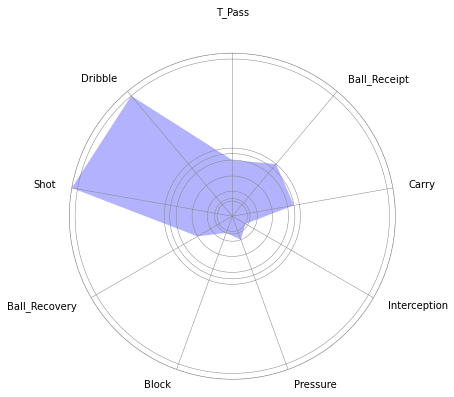

Player Name :  Lionel Andrés Messi Cuccittini 
Rating :  100.0


,T_Pass,Ball_Receipt,Carry,Interception,Pressure,Block,Ball_Recovery,Shot,Dribble
59,1477,469,406,2,69,4,23,33,35


In [ ]:
#profile-radar
footstats = arr

values = d

plt.figure(figsize=(12,6))

N = len(footstats)
x_as = [n / float(N) * 2 * math.pi for n in range(N)]

values += values[:1]
x_as += x_as[:1]


plt.rc('axes', linewidth=0.5, edgecolor="#888888")
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)

ax.set_rlabel_position(0)

ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

plt.xticks(x_as[:-1], [])
plt.yticks(values[:-1], [])

ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
ax.fill(x_as, values, 'b', alpha=0.3)

plt.ylim(0, 60) 

for i in range(N):
    angle_rad = i / float(N) * 2 * math.pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < math.pi:
        ha, distance_ax = "left", 1
    elif angle_rad == math.pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 65 + distance_ax, footstats[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()
score_2 = 0.9033834586466166
print("Player Name : ", player_name, "\nRating : ", (count*100))
player_data

 **<h1>HeatMaps**

In [ ]:
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import seaborn as sns
import squarify

def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

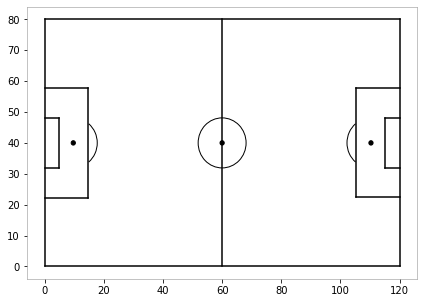

In [ ]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

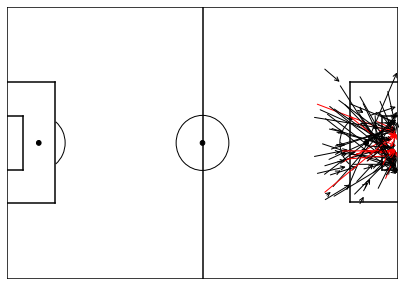

In [ ]:
shot_data = all_data[(all_data['type_name'] == "Shot") & (all_data['team_name'] == 'Barcelona')]

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_data)):
    # can also differentiate different half by different color
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
           xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
           arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

In [ ]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

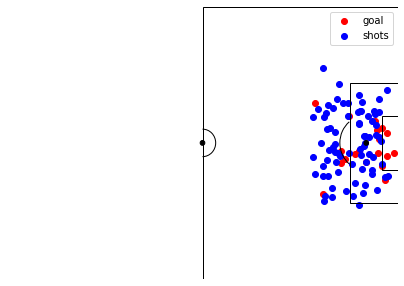

In [ ]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
Score = 0.8813454846727423
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
Score_2 = 0.9346898496240602
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


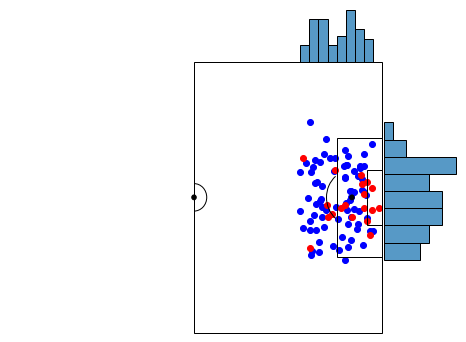

In [ ]:
# we use a joint plot to see the density of the shot distribution across the 2 axes of the pitch
joint_shot_chart = sns.jointplot(x_coord, y_coord, kind='scatter', space=0, alpha=0.5)
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
# overlaying the plot with a pitch
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
joint_shot_chart.ax_marg_x.set_axis_off()
ax.set_axis_off()
plt.ylim(-.5, 80)
plt.axis('off')
plt.show()

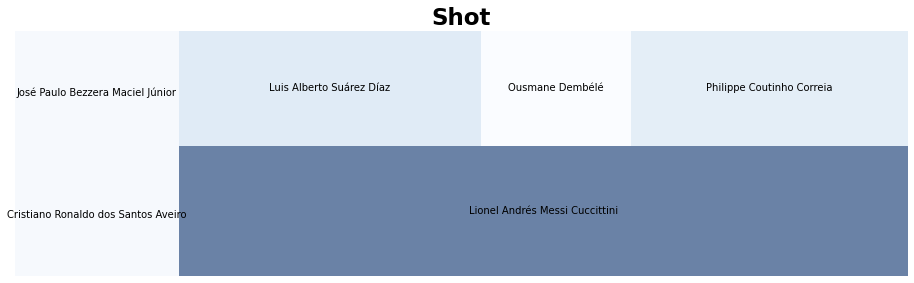

In [ ]:
import matplotlib
dataDribble= summary[summary["Shot"]>5]
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(dataDribble.Shot), vmax=max(dataDribble.Shot))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataDribble.Shot]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=dataDribble.player_name,sizes=dataDribble.Shot, color = colors, alpha=.6)
plt.title("Shot",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

**<h3>PREDICT**

In [ ]:
# Read data from the CSV into a dataframe

raw_data_1 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2000-01.csv')
raw_data_2 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2001-02.csv')
raw_data_3 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2002-03.csv')
raw_data_4 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2003-04.csv')
raw_data_5 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2004-05.csv')
raw_data_6 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2005-06.csv')
raw_data_7 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2006-07.csv')
raw_data_8 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2007-08.csv')
raw_data_9 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2008-09.csv')
raw_data_10 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2009-10.csv')
raw_data_11 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2010-11.csv')
raw_data_12 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2011-12.csv')
raw_data_13 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2012-13.csv')
raw_data_14 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2013-14.csv')
raw_data_15 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2014-15.csv')
raw_data_16 = pd.read_csv('/content/drive/MyDrive/dataSets/SoccerData/2015-16.csv')

In [ ]:
# Selecting the features

raw_data_1 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_2 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_3 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_4 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_5 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_6 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_7 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_8 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_9 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_10 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_11 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_12 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_13 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_14 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_15 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_16 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

In [ ]:
# Concating the data on one dataframe

playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16],ignore_index=True)

In [ ]:
playing_stat.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Charlton,Man City,4,0,H,2,0,H,17,8,14,4,13,12,6,6,1,2,0,0
1,Chelsea,West Ham,4,2,H,1,0,H,17,12,10,5,19,14,7,7,1,2,0,0
2,Coventry,Middlesbrough,1,3,A,1,1,D,6,16,3,9,15,21,8,4,5,3,1,0
3,Derby,Southampton,2,2,D,1,2,A,6,13,4,6,11,13,5,8,1,1,0,0
4,Leeds,Everton,2,0,H,2,0,H,17,12,8,6,21,20,6,4,1,3,0,0


In [ ]:
# Creating csv file from the merged dataframe

playing_stat.to_csv("Merged_dataset.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataSets/SoccerData/Merged_dataset.csv")

In [ ]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 6080.0
avg_away_scored = df.FTAG.sum() / 6080.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_home_conceded)
print(avg_away_conceded)

1.0657894736842106
1.5447368421052632


In [ ]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')
res_home.HomeTeam.all().index

Index(['Arsenal', 'Aston Villa', 'Bradford', 'Charlton', 'Chelsea', 'Coventry',
       'Derby', 'Everton', 'Ipswich', 'Leeds', 'Leicester', 'Liverpool',
       'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Southampton',
       'Sunderland', 'Tottenham', 'West Ham'],
      dtype='object', name='HomeTeam')

In [ ]:
table.Team = res_home.HomeTeam.all().index
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#19 Home matches for each team each season and 16 seasons therefore 304 home matches and 304 away matches
table.HAS = (table.HGS / 304.0) / avg_home_scored
table.AAS = (table.AGS / 304.0) / avg_away_scored
table.HDS = (table.HGC / 304.0) / avg_home_conceded
table.ADS = (table.AGC / 304.0) / avg_away_conceded

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,720,288,1.533220,0.888889,208,400,0.641975,0.851789
1,Aston Villa,432,304,0.919932,0.938272,320,368,0.987654,0.783646
2,Bradford,320,160,0.681431,0.493827,464,656,1.432099,1.396934
3,Charlton,496,304,1.056218,0.938272,304,608,0.938272,1.294719
4,Chelsea,704,384,1.499148,1.185185,320,400,0.987654,0.851789
5,Coventry,224,352,0.477002,1.086420,368,640,1.135802,1.362862
6,Derby,368,224,0.783646,0.691358,384,560,1.185185,1.192504
7,Everton,464,256,0.988075,0.790123,432,512,1.333333,1.090290
8,Ipswich,496,416,1.056218,1.283951,240,432,0.740741,0.919932
9,Leeds,576,448,1.226576,1.382716,336,352,1.037037,0.749574


HGS - Home Goals Scored

HGC - Home Goals Conceded

AGS - Away Goals Scored

AGC - Away Goals Conceded

HAS - Home Attacking Strength

HDS - Home Defensive Strength

AAS - Away Attacking Strength

ADS - Away Defensive Strength

In [ ]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]
feature_table

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,Charlton,Man City,4,0,H,2,0,H,17,8,14,4,13,12,6,6,1,2,0,0
1,1,Chelsea,West Ham,4,2,H,1,0,H,17,12,10,5,19,14,7,7,1,2,0,0
2,2,Coventry,Middlesbrough,1,3,A,1,1,D,6,16,3,9,15,21,8,4,5,3,1,0
3,3,Derby,Southampton,2,2,D,1,2,A,6,13,4,6,11,13,5,8,1,1,0,0
4,4,Leeds,Everton,2,0,H,2,0,H,17,12,8,6,21,20,6,4,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,Man City,Chelsea,1,2,A,1,1,D,3,9,1,3,22,18,8,7,4,2,0,0
6076,6076,Middlesbrough,West Ham,2,1,H,2,1,H,19,11,7,5,13,15,5,6,0,0,0,0
6077,6077,Newcastle,Aston Villa,3,0,H,2,0,H,9,5,5,1,10,14,5,1,0,5,1,1
6078,6078,Southampton,Arsenal,3,2,H,0,1,A,11,8,7,5,17,10,7,5,1,2,0,0


In [ ]:
#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])


feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
0,Charlton,Man City,H,14,4,6,6,1.056218,0.938272,1.037037,1.158433
1,Chelsea,West Ham,H,10,5,7,7,1.499148,0.987654,1.037037,1.022147
2,Coventry,Middlesbrough,A,3,9,8,4,0.477002,1.135802,1.283951,0.715503
3,Derby,Southampton,D,4,6,5,8,0.783646,1.185185,0.641975,0.885860
4,Leeds,Everton,H,8,6,6,4,1.226576,1.037037,0.790123,1.090290
...,...,...,...,...,...,...,...,...,...,...,...
6075,Man City,Chelsea,A,1,3,8,7,0.681431,1.530864,1.185185,0.851789
6076,Middlesbrough,West Ham,H,7,5,5,6,0.613288,1.135802,1.037037,1.022147
6077,Newcastle,Aston Villa,H,5,1,5,1,0.885860,0.839506,0.938272,0.783646
6078,Southampton,Arsenal,H,7,5,7,5,0.919932,1.086420,0.888889,0.851789


In [ ]:
feature_table.to_csv("Feature_table.csv")

Converting categorical Data into Numerical Equivalent

In [ ]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [ ]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
0,Charlton,Man City,H,14,4,6,6,1.056218,0.938272,1.037037,1.158433,1
1,Chelsea,West Ham,H,10,5,7,7,1.499148,0.987654,1.037037,1.022147,1
2,Coventry,Middlesbrough,A,3,9,8,4,0.477002,1.135802,1.283951,0.715503,-1
3,Derby,Southampton,D,4,6,5,8,0.783646,1.185185,0.641975,0.885860,0
4,Leeds,Everton,H,8,6,6,4,1.226576,1.037037,0.790123,1.090290,1


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [ ]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','HST','AST','HC','AC']]
y_train = feature_table['Result']
X_Train, X_Test, y_Train, y_Test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
X_Train_2, X_Test_2, y_Train, y_Test = train_test_split(X_train_2, y_train, test_size = 0.3, random_state = 0)
display(X_Train.head())
display(X_Train_2.head())

,HAS,HDS,AAS,ADS
45,0.613288,1.135802,0.790123,1.090290
2080,1.056218,0.938272,0.790123,1.090290
5793,1.669506,0.592593,1.382716,0.749574
87,0.783646,1.185185,1.530864,0.851789
1744,1.056218,0.740741,0.543210,0.954003


,HAS,HDS,AAS,ADS,HST,AST,HC,AC
45,0.613288,1.135802,0.790123,1.090290,5,9,7,7
2080,1.056218,0.938272,0.790123,1.090290,7,4,13,6
5793,1.669506,0.592593,1.382716,0.749574,14,0,12,4
87,0.783646,1.185185,1.530864,0.851789,0,11,4,3
1744,1.056218,0.740741,0.543210,0.954003,9,3,8,1


In [ ]:
clf1 = MultinomialNB(alpha=188)
clf1.fit(X_train,y_train)
clf1.fit(X_train_2,y_train)
scores = cross_val_score(clf1, X_Train, y_Train, cv=10)
scores_2 = cross_val_score(clf1, X_Train_2, y_Train, cv=10)
print ("NB alpha ",clf1.alpha," ", scOre, " : ", scOre_2)

NB alpha  188   0.6790886495443248  :  0.7636735708367854


In [ ]:
from sklearn.preprocessing import normalize
X_Train = normalize(X_Train)
X_Train_2 = normalize(X_Train_2)
pd.set_option('display.expand_frame_repr', False)

display(X_Train)
display(X_Train_2)

array([[0.32879482, 0.60892439, 0.42359958, 0.58452412],
       [0.54118959, 0.48075567, 0.40484688, 0.55864731],
       [0.70472898, 0.25014417, 0.58366972, 0.31640893],
       ...,
       [0.2926523 , 0.65745604, 0.63624778, 0.27801969],
       [0.25780374, 0.6138639 , 0.58717416, 0.46036382],
       [0.55521485, 0.4694193 , 0.3576528 , 0.58606012]])

array([[0.0425772 , 0.07885251, 0.05485392, ..., 0.62482044, 0.48597146,
        0.48597146],
       [0.06383072, 0.05670283, 0.04774975, ..., 0.24173312, 0.78563263,
        0.36259967],
       [0.08779433, 0.03116267, 0.0727129 , ..., 0.        , 0.63104411,
        0.21034804],
       ...,
       [0.04238941, 0.09522964, 0.09215771, ..., 0.24882583, 0.62206457,
        0.68427102],
       [0.04054293, 0.09653794, 0.09234063, ..., 0.25498607, 0.50997214,
        0.25498607],
       [0.10721533, 0.09064769, 0.06906491, ..., 0.43705137, 0.52446165,
        0.3496411 ]])

**<h3>SVM**

In [ ]:
clf = SVC(kernel = 'linear', C = 7, probability = True)
clf.fit(X_Train,y_Train)
scores = cross_val_score(clf, X_Train, y_Train, cv=10)
y_pred = clf.predict(X_Test)
print(y_pred[:10])
clf.fit(X_Train_2,y_Train)
scores_2 = cross_val_score(clf, X_Train_2, y_Train, cv=8)
y_pred = clf.predict(X_Test_2)
print(y_pred[:10])
print ("SVM"," : ", Score, " : ", Score_2)

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
SVM  :  0.8813454846727423  :  0.9346898496240602


In [ ]:
c_test = [[1.533220,	0.641975,	0.938272,	0.783646,	10,	3,	7,	4]]
y_pred = clf.predict(c_test)
if y_pred == [1]:  
  print("Home Team Will Win")
elif y_pred == [0]:
  print("The Game Will Tie")
else:
  print("Home Team Will Lose")

Home Team Will Win


**<h3>Logistic Regression** 

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_Train, y_Train, cv=8)
y_pred = clf.predict(X_Test)
print(y_pred[:10])
clf.fit(X_train_2,y_train)
scores_2 = cross_val_score(clf, X_Train_2, y_Train, cv=8)
y_pred = clf.predict(X_Test_2)
print(y_pred[:10])
 
print ("Logreg"," : ", sCore, " : ", sCore_2)

[ 0  1  1  1 -1 -1  1  1  1  1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[-1  1  1  1  1  0  1  1  1  1]
Logreg  :  0.855917149958575  :  0.9033834586466166


In [ ]:
c_test = [[0.885860, 0.839506, 1.283951, 0.715503, 5, 4, 5, 1]]
y_pred = clf.predict(c_test)
if y_pred == [1]:  
  print("Home Team Will Win")
elif y_pred == [0]:
  print("The Game Will Tie")
else:
  print("Home Team Will Lose")

Home Team Will Lose
